In [26]:
import os
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [28]:
# 현재경로 확인
os.getcwd()

'C:\\Users\\82107\\online'

In [29]:
# 데이터 불러오기

corolla = pd.read_csv('/Users/82107/data/ToyotaCorolla.csv')
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [8]:
# 데이터 수와 변수의 수 확인하기

nCar = corolla.shape[0]
nYar = corolla.shape[1]
print(nCar)
print(nYar)

1436
37


## 범주형 변수를 이진형 변수로 변환

In [30]:
## 가변수 생성
corolla.Fuel_Type.unique()
dummy_p = np.repeat(0,nCar)
dummy_b = np.repeat(0,nCar)
dummy_c = np.repeat(0,nCar)

In [35]:
corolla.Fuel_Type.unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [31]:
dummy_p


array([0, 0, 0, ..., 0, 0, 0])

In [43]:
# 인덱스 슬라이싱 후 (binary = 1) 대입
p_idx = np.array(corolla.Fuel_Type == "Petrol")
d_idx = np.array(corolla.Fuel_Type == "Disel")
c_idx = np.array(corolla.Fuel_Type == "CNG")

In [44]:
p_idx

array([False, False, False, ...,  True,  True,  True])

In [48]:
dummy_p[p_idx] = 1
dummy_b[d_idx] = 1
dummy_c[c_idx] = 1

In [46]:
dummy_p

array([0, 0, 0, ..., 1, 1, 1])

## 불필요한 변수 제거 및 가변수 추가

In [51]:
Fuel = pd.DataFrame({'Petrol' : dummy_p, 'Disel' : dummy_b, 'CNG' : dummy_c})

In [52]:
Fuel

,Petrol,Disel,CNG
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
1431,1,0,0
1432,1,0,0
1433,1,0,0
1434,1,0,0


In [68]:
corolla_ = corolla.drop(['Id', 'Model', 'Fuel_Type'], axis=1, inplace=False)
mlr_data = pd.concat((corolla_,Fuel),1)
mlr_data.head()

C:\Users\82107\AppData\Local\Temp/ipykernel_24220/2583893356.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  mlr_data = pd.concat((corolla_,Fuel),1)


,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Disel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,0,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,0,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,0,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,0,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,0,0


In [69]:
# bias 추가
mlr_data = sm.add_constant(mlr_data, has_constant='add')
mlr_data.head()

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Disel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,0,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,0,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,0,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,0,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,0,0


## 설명변수(X), 타켓변수(Y) 분리 및 학습데이터와 평가데이터 분할

In [70]:
feature_columns = list(mlr_data.columns.difference(['Price']))

X = mlr_data[feature_columns]
y = mlr_data.Price
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


In [72]:
# Train the MLR / 회귀모델적합

full_model = sm.OLS(train_y, train_x)
fitted_full_model = full_model.fit()

In [74]:
 ## R2가 높고, 대부분의 변수들이 유의
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     281.2
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:33:15   Log-Likelihood:                -8464.9
No. Observations:                1005   AIC:                         1.700e+04
Df Residuals:                     971   BIC:                         1.716e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -311.2587    141.902     -2.193      0.029    -589.729     -32.788
Age_08_04         -123.2829      4.220    -29.216      0.000    -131.564    -115.002
Airbag_1          -117.5048    268.108     -0.438      0.661    -643.642     408.632
Airbag_2          -109.6359    144.917     -0.757      0.450    -394.022     174.750
Airco              143.1567     96.866      1.478      0.140     -46.934     333.247
Automatic          556.8155    157.199      3.542      0.000     248.327     865.304
Automatic_airco   2542.9909    198.649     12.801      0.000    2153.160    2932.822
BOVAG_Guarantee    407.2806    139.263      2.925      0.004     133.989     680.572
Backseat_Divider  -165.2569    139.849     -1.182      0.238    -439.698     109.184
Boardcomputer     -265.9620    127.720     -2.082      0.038    -516.600     -15.324
CD_Player          208.2627    107.927      1.930      0.054      -3.535     420.060
CNG              -1598.2836    364.853     -4.381      0.000   -2314.275    -882.292
Central_Lock       -58.0453    153.113     -0.379      0.705    -358.516     242.426
Cylinders           -0.0332      0.002    -13.932      0.000      -0.038      -0.029
Disel             3.302e-09   1.59e-09      2.080      0.038    1.86e-10    6.42e-09
Doors              117.1120     42.678      2.744      0.006      33.361     200.863
Gears              137.2702    216.962      0.633      0.527    -288.498     563.039
Guarantee_Period    54.8292     17.119      3.203      0.001      21.234      88.425
HP                  24.8960      3.539      7.035      0.000      17.951      31.841
KM                  -0.0150      0.001    -11.004      0.000      -0.018      -0.012
Met_Color          -47.8496     81.538     -0.587      0.557    -207.861     112.162
Metallic_Rim       197.0595    101.002      1.951      0.051      -1.148     395.267
Mfg_Month         -112.4344     10.963    -10.256      0.000    -133.949     -90.920
Mfg_Year             3.0071      0.909      3.308      0.001       1.223       4.791
Mfr_Guarantee      199.1558     79.139      2.517      0.012      43.852     354.460
Mistlamps           23.2477    118.060      0.197      0.844    -208.434     254.929
Petrol             391.0155    327.952      1.192      0.233    -252.561    1034.592
Power_Steering     174.0373    321.614      0.541      0.589    -457.101     805.175
Powered_Windows    367.7834    154.588      2.379      0.018      64.417     671.149
Quarterly_Tax       11.7159      2.042      5.738      0.000       7.709      15.723
Radio             1477.4217    811.686      1.820      0.069    -115.439    3070.282
Radio_cassette   -1534.9032    809.521     -1.896      0.058   -3123.515      53.709
Sport_Model        378.8231     94.054      4.028      0.000     194.251     563.395
Tow_Bar           -221.

## VIF를 통한 다중공선성 확인

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    mlr_data.values, i) for i in range(mlr_data.shape[1])]
vif["features"] = mlr_data.columns
vif

C:\Users\82107\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\82107\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\82107\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF Factor,features
0,0.000000,const
1,10.953474,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.400334,KM
6,2.621514,HP
7,1.143778,Met_Color
8,1.121303,Automatic
9,1.258641,cc


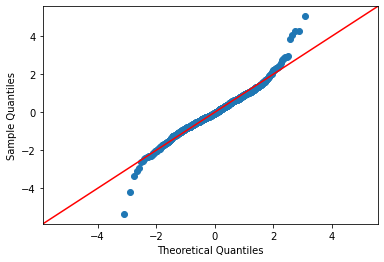

In [76]:
# 학습데이터의 잔차 확인
res = fitted_full_model.resid
# q-q plot # 정규분포 확인
fig = sm.qqplot(res, fit=True, line='45')

Text(0, 0.5, 'Residual')

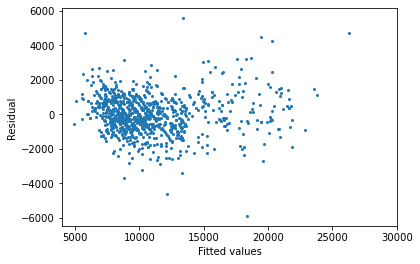

In [78]:
# residual pattern 확인
pred_y = fitted_full_model.predict(train_x)
import matplotlib.pyplot as plt
fig = plt.scatter(pred_y,res, s=4)
plt.xlim(4000,30000)
plt.xlim(4000,30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

In [79]:
 ## 검증 데이터에 대한 예측 
    
pred_y2 = fitted_full_model.predict(test_x) 

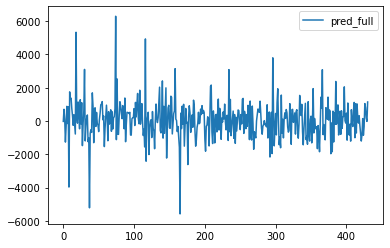

In [80]:
## 잔차 plot
plt.plot(np.array(test_y-pred_y2),label="pred_full")
plt.legend()
plt.show()

In [81]:
from sklearn.metrics import mean_squared_error

In [82]:
## MSE 성능
mean_squared_error(y_true = test_y, y_pred = pred_y2)

1265794.9650585677